In [ ]:
# Looking at stats by county:  population, income, poverty
# Using Census data for 2017, from https://www.kaggle.com/muhsina/data-analysis-acs-data

In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

In [10]:
# Read dataset
census_df = pd.read_csv('./WebVisualizations/Resources/acs2017_county_data.csv', index_col=0)

In [11]:
census_df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [26]:
census_2_df = census_df.filter(['CensusID', 'State', 'County','TotalPop', 'Men', 'Women', 'White', 'Income', 'Poverty'], axis = 1)

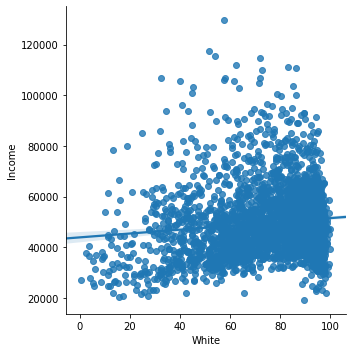

In [45]:
# Use a scatterplot to look at relationship between % of population that is white vs. income
fig = sns.lmplot(x='White', y='Income', data=census_2_df)
fig.savefig('./WebVisualizations/visualizations/scatter_income_to_pctWhite.png')

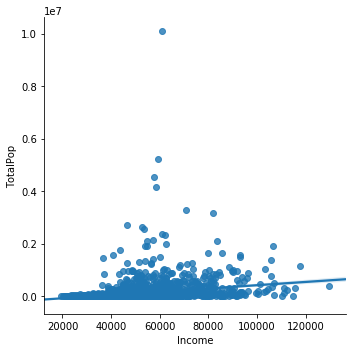

In [44]:
# Scatterplot of total population to income
fig = sns.lmplot(x='Income', y='TotalPop', data=census_2_df)
fig.savefig('./WebVisualizations/visualizations/scatter_totalpop_to_income.png')

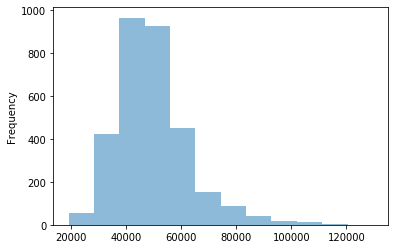

In [51]:
# Plot histogram of Income
ax = census_2_df['Income'].plot.hist(bins=12, alpha=0.5)
fig = ax.get_figure()
fig.savefig('./WebVisualizations/visualizations/histogram_income.png')

In [40]:
# Bar chart of 10 counties with highest poverty rate
# Get States of indexes for which column State is Puerto Rico
indexStates = census_2_df[ census_2_df['State'] == 'Puerto Rico' ].index

# Delete these row indexes from dataFrame
census_2_df.drop(indexStates, inplace = True)
census_2_df['State-County'] = census_2_df['State'].str.cat(census_2_df['County'], sep= "-")
high_poverty_df = census_2_df.nlargest(10,'Poverty')
high_poverty_df

,State,County,TotalPop,Men,Women,White,Income,Poverty,State-County
CountyId,,,,,,,,,
46121,South Dakota,Todd County,10016,4905,5111,8.5,26285,52.0,South Dakota-Todd County
46102,South Dakota,Oglala Lakota County,14291,6934,7357,4.1,27804,51.9,South Dakota-Oglala Lakota County
22035,Louisiana,East Carroll Parish,7318,4409,2909,27.3,20795,48.2,Louisiana-East Carroll Parish
46031,South Dakota,Corson County,4177,2125,2052,29.3,32260,47.9,South Dakota-Corson County
28063,Mississippi,Jefferson County,7463,3671,3792,13.1,21779,47.0,Mississippi-Jefferson County
28051,Mississippi,Holmes County,18267,8707,9560,15.6,20330,46.5,Mississippi-Holmes County
28021,Mississippi,Claiborne County,9106,4269,4837,12.1,24601,45.9,Mississippi-Claiborne County
46071,South Dakota,Jackson County,3275,1659,1616,42.9,38041,44.8,South Dakota-Jackson County
46137,South Dakota,Ziebach County,2837,1421,1416,23.4,35000,43.1,South Dakota-Ziebach County


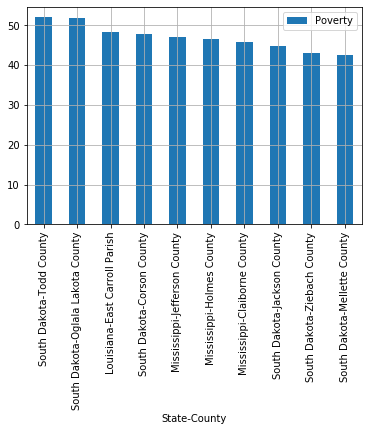

In [53]:
ax = high_poverty_df.plot.bar(x='State-County', y='Poverty')
ax.grid(True)